In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time


In [3]:
apple = pd.read_csv("AAPL_stock_data.csv", index_col = "Date", parse_dates = ['Date'])
apple

,Open,High,Low,Close,Volume,Name
Date,,,,,,
1999-11-01,80.00,80.69,77.37,77.62,2487300,AAPL
1999-11-02,78.00,81.69,77.31,80.25,3564600,AAPL
1999-11-03,81.62,83.25,81.00,81.50,2932700,AAPL
1999-11-04,82.06,85.37,80.62,83.62,3384700,AAPL
1999-11-05,84.62,88.37,84.00,88.31,3721500,AAPL
...,...,...,...,...,...,...
2024-02-28,182.51,183.12,180.13,181.42,48953939,AAPL
2024-02-29,181.27,182.57,179.53,180.75,136682597,AAPL
2024-03-01,179.55,180.53,177.38,179.66,73563082,AAPL


In [4]:
amazon = pd.read_csv("amzn_stock_data.csv", index_col = "Date", parse_dates = ['Date'])
amazon

,Open,High,Low,Close,Volume,Name
Date,,,,,,
1999-11-01,68.06,71.880,66.310,69.13,12824100,AMZN
1999-11-02,69.75,70.000,65.060,66.44,13243200,AMZN
1999-11-03,68.19,68.500,65.000,65.81,10772100,AMZN
1999-11-04,67.19,67.190,61.000,63.06,16759200,AMZN
1999-11-05,64.75,65.500,62.250,64.94,11091400,AMZN
...,...,...,...,...,...,...
2024-02-28,172.44,174.050,172.270,173.16,28180482,AMZN
2024-02-29,173.01,177.220,172.850,176.76,53805359,AMZN
2024-03-01,176.75,178.725,176.070,178.22,31981152,AMZN


In [5]:
from pylab import rcParams
import statsmodels.api as sm

In [6]:
amazon = amazon.sort_values('Date')
amazon.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
1999-11-01,68.06,71.88,66.31,69.13,12824100,AMZN
1999-11-02,69.75,70.00,65.06,66.44,13243200,AMZN
1999-11-03,68.19,68.50,65.00,65.81,10772100,AMZN
1999-11-04,67.19,67.19,61.00,63.06,16759200,AMZN
1999-11-05,64.75,65.50,62.25,64.94,11091400,AMZN


In [7]:


filepath = 'amzn_stock_data.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()


,Date,Open,High,Low,Close,Volume,Name
0,1999-11-01,68.06,71.88,66.31,69.13,12824100,AMZN
1,1999-11-02,69.75,70.00,65.06,66.44,13243200,AMZN
2,1999-11-03,68.19,68.50,65.00,65.81,10772100,AMZN
3,1999-11-04,67.19,67.19,61.00,63.06,16759200,AMZN
4,1999-11-05,64.75,65.50,62.25,64.94,11091400,AMZN


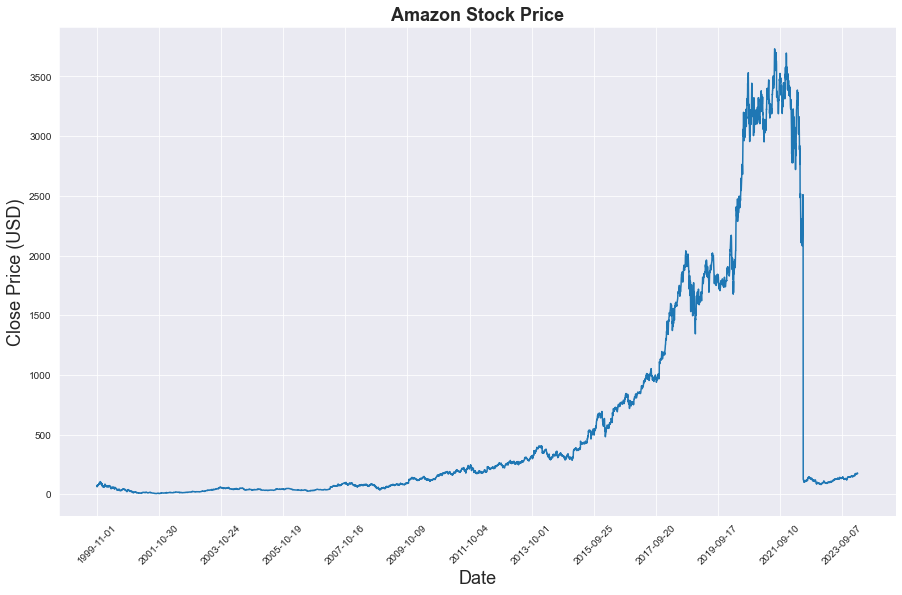

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()


In [9]:
price_amazon = data_amazon[['Close']]
price_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6124 entries, 0 to 6123
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6124 non-null   float64
dtypes: float64(1)
memory usage: 95.7 KB


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))


/var/folders/14/40kz05xn5y1f0wnh3xbqjq640000gn/T/ipykernel_12547/2996122896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_amazon['Close'] = scaler.fit_transform(price_amazon['Close'].values.reshape(-1,1))


In [11]:


def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]
     

In [12]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price_amazon, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (4883, 19, 1)
y_train.shape =  (4883, 1)
x_test.shape =  (1221, 19, 1)
y_test.shape =  (1221, 1)


In [ ]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)


In [ ]:
input_dim = 1
hidden_dim = 24
num_layers = 2
output_dim = 1
num_epochs = 105


In [1]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out


NameError: name 'nn' is not defined

In [36]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
     

In [38]:


hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time()-start_time    
print("Training time: {}".format(training_time))


Epoch  0 MSE:  0.9678982496261597
Epoch  1 MSE:  0.7496070861816406
Epoch  2 MSE:  0.5496397614479065
Epoch  3 MSE:  0.3604359030723572
Epoch  4 MSE:  0.18669316172599792
Epoch  5 MSE:  0.06118602678179741
Epoch  6 MSE:  0.045747652649879456
Epoch  7 MSE:  0.13892154395580292
Epoch  8 MSE:  0.1828821450471878
Epoch  9 MSE:  0.15194089710712433
Epoch  10 MSE:  0.09578986465930939
Epoch  11 MSE:  0.052818771451711655
Epoch  12 MSE:  0.035953789949417114
Epoch  13 MSE:  0.040193669497966766
Epoch  14 MSE:  0.05424511060118675
Epoch  15 MSE:  0.06824607402086258
Epoch  16 MSE:  0.07655082643032074
Epoch  17 MSE:  0.07744607329368591
Epoch  18 MSE:  0.07181961834430695
Epoch  19 MSE:  0.06196249648928642
Epoch  20 MSE:  0.05071987584233284
Epoch  21 MSE:  0.04084080830216408
Epoch  22 MSE:  0.03440282866358757
Epoch  23 MSE:  0.03232615068554878
Epoch  24 MSE:  0.03412468731403351
Epoch  25 MSE:  0.03808509558439255
Epoch  26 MSE:  0.04193482920527458
Epoch  27 MSE:  0.04376795515418053
Epo

In [39]:

predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

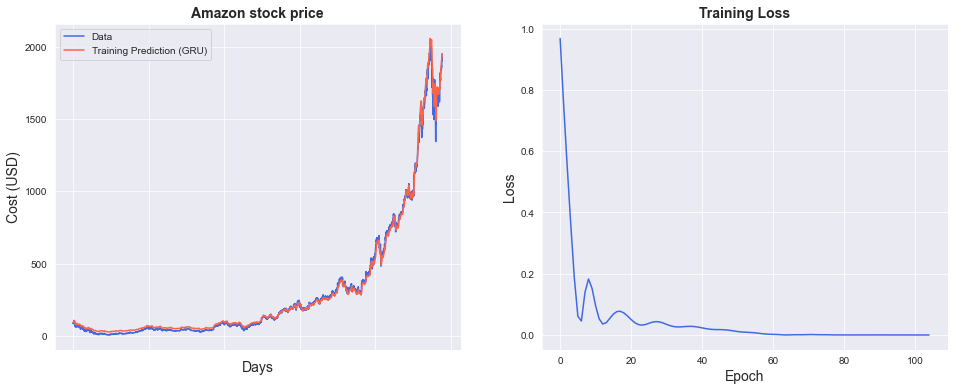

In [40]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='tomato')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [41]:

import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train Score: 23.73 RMSE
Test Score: 140.91 RMSE
